## 线性可分支持向量机
## 任务：观察C取值对决策边界的影响
## 数据集：data/ex6data1.mat

在本练习中，我们将使用支持向量机（SVM）来构建垃圾邮件分类器。 我们将从一些简单的2D数据集开始使用SVM来查看它们的工作原理。 然后，我们将对一组原始电子邮件进行一些预处理工作，并使用SVM在处理的电子邮件上构建分类器，以确定它们是否为垃圾邮件。
我们要做的第一件事是看一个简单的二维数据集，看看线性SVM如何对数据集进行不同的C值（类似于线性/逻辑回归中的正则化项）。 

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = sio.loadmat('./data/ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X,y = data['X'],data['y']
X.shape,y.shape

((51, 2), (51, 1))

In [4]:
def plot_data():
    plt.scatter(X[:,0],X[:,1],c = y.flatten(), cmap ='jet')
    plt.xlabel('x1')
    plt.ylabel('y1')

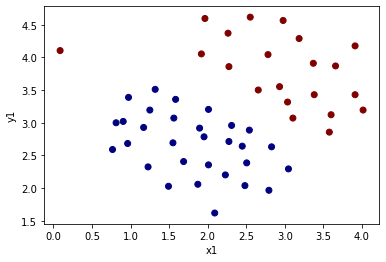

In [5]:
plot_data()

In [6]:
from sklearn.svm import SVC
from sklearn import svm

In [7]:
svc1=SVC(C=1,kernel='linear')
svc1.fit(X,y.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
svc1.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [9]:
svc1.score(X,y)

0.9803921568627451

In [10]:
svc2 = SVC(C=100,kernel='linear')
svc2.fit(X,y.flatten())
svc2.score(X,y.flatten())

1.0

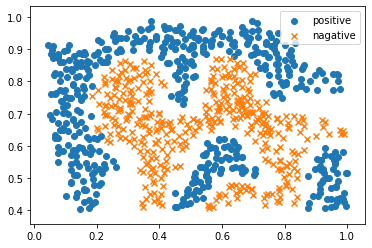

In [11]:
raw_data = sio.loadmat('data/ex6data2.mat')
data = pd.DataFrame(raw_data['X'],columns=['X1','X2'])
data['y']=raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig,ax = plt.subplots()
ax.scatter(positive['X1'],positive['X2'],marker='o',label='positive')
ax.scatter(negative['X1'],negative['X2'],marker='x',label='nagative')
plt.legend()
plt.show()

In [12]:
svc=svm.SVC(C=100,gamma=10,probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9698725376593279

对于第三个数据集，我们给出了训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。 虽然我们可以使用scikit-learn的内置网格搜索来做到这一点，但是本着遵循练习的目的，我们将从头开始实现一个简单的网格搜索。

In [14]:
raw_data = sio.loadmat('data/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

现在，我们将进行第二部分的练习。 在这一部分中，我们的目标是使用SVM来构建垃圾邮件过滤器。 在练习文本中，有一个任务涉及一些文本预处理，以获得适合SVM处理的格式的数据。 然而，这个任务很简单（将字词映射到为练习提供的字典中的ID），而其余的预处理步骤（如HTML删除，词干，标准化等）已经完成。 我将跳过机器学习任务，而不是重现这些预处理步骤，其中包括从预处理过的训练集构建分类器，以及将垃圾邮件和非垃圾邮件转换为单词出现次数的向量的测试数据集。

In [15]:
spam_train = sio.loadmat('data/spamTrain.mat')
spam_test = sio.loadmat('data/spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [16]:
X=spam_train['X']
y = spam_train['y'].ravel()
Xtest = spam_test['Xtest']
ytest = spam_test['ytest'].ravel()

X.shape,y.shape,Xtest.shape,ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [17]:
svc=svm.SVC(gamma='auto')
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
svc.score(X, y)

0.944

In [19]:
svc.score(Xtest, ytest)

0.953